In [0]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

import math

from statistics import variance
from scipy.stats import anderson

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import ttest_ind

from scipy.stats import f_oneway

from scipy.stats import chi2_contingency

In [0]:
#--------------------Run this cell to mount your Google Drive-------------------
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Cutlets.csv

#Reading the file from Google Drive

data = pd.read_csv("/content/drive/My Drive/ER/Hypothesis Testing/Cutlets.csv")
#data_x = data.drop(labels = ["y"], axis = 1)
#data_y = data["y"]

In [0]:
sns.set_style(style = "whitegrid")

In [0]:
len(data)

35

In [0]:
data.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [0]:
data.mean()

Unit A    7.019091
Unit B    6.964297
dtype: float64

In [0]:
#Significance Level - 5%
#Null Hypothesis - Mean of Unit A and Unit B is same. mu(A) = mu(B)
#Alternate Hypothesis - Mean of Unit A and Unit B is not same. mu(A) != mu(B)

In [0]:
#Mean
mean_A = data["Unit A"].mean()
mean_B = data["Unit B"].mean()

In [0]:
#Variance
var_A = variance(data["Unit A"])
var_B = variance(data["Unit B"])

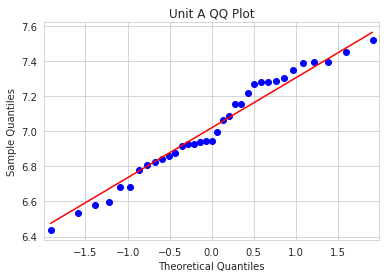

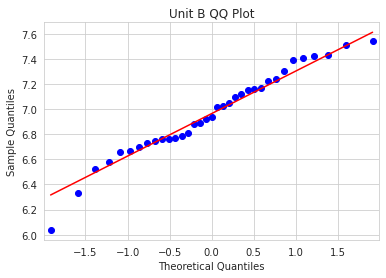

In [0]:
#QQ Plot for Normality Test
qqplot(data["Unit A"], line = "s")
plt.title("Unit A QQ Plot")
plt.show()                            #Unit A looks like its following Normal Distribution
print("\n")
qqplot(data["Unit B"], line = "s")
plt.title("Unit B QQ Plot")
plt.show()                            #Unit B looks like its following Normal Distribution

In [0]:
#Test for Normality: Anderson Darlington Test

print("Andreson Result for Unit B: ", anderson(data["Unit B"]))
print("Andreson Result for Unit A: ", anderson(data["Unit A"]))

Andreson Result for Unit B:  AndersonResult(statistic=0.26122996618448013, critical_values=array([0.527, 0.6  , 0.719, 0.839, 0.998]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Andreson Result for Unit A:  AndersonResult(statistic=0.43309493801665866, critical_values=array([0.527, 0.6  , 0.719, 0.839, 0.998]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [0]:
#Statistic Test
#Independent Sample T-Test

t_val, p_val = ttest_ind(data["Unit A"], data["Unit B"])

In [0]:
print("T- Statistic: ", t_val)
print("P Value: ", p_val)

T- Statistic:  0.7228688704678061
P Value:  0.4722394724599501


In [0]:
#As the P Value(0.4722) is greater than the significance level(0.05), we fail to reject Null Hypothesis.
#Hence according to Problem Statement, we can say that there is no significant difference between diameters
#of cutlets from Unit A and Unit B.

In [0]:
#LabTAT.csv

#Reading the file from Google Drive

data = pd.read_csv("/content/drive/My Drive/ER/Hypothesis Testing/LabTAT.csv")
#data_x = data.drop(labels = ["y"], axis = 1)
#data_y = data["y"]

In [0]:
data.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [0]:
#Mean

mean_l1 = data["Laboratory 1"].mean()
mean_l2 = data["Laboratory 2"].mean()
mean_l3 = data["Laboratory 3"].mean()
mean_l4 = data["Laboratory 4"].mean()

In [0]:
print("Mean of Lab 1: ", mean_l1)
print("Mean of Lab 2: ", mean_l2)
print("Mean of Lab 3: ", mean_l3)
print("Mean of Lab 4: ", mean_l4)

Mean of Lab 1:  178.36158333333339
Mean of Lab 2:  178.9029166666668
Mean of Lab 3:  199.91325000000003
Mean of Lab 4:  163.6827499999999


In [0]:
#Variance

var_l1 = variance(data["Laboratory 1"])
var_l2 = variance(data["Laboratory 2"])
var_l3 = variance(data["Laboratory 3"])
var_l4 = variance(data["Laboratory 4"])

In [0]:
print("Variance Laboratory 1: ", var_l1)
print("Variance Laboratory 2: ", var_l2)
print("Variance Laboratory 3: ", var_l3)
print("Variance Laboratory 4: ", var_l4)

Variance Laboratory 1:  173.54356806022406
Variance Laboratory 2:  223.71525108543423
Variance Laboratory 3:  273.5396069957983
Variance Laboratory 4:  227.55963186974788


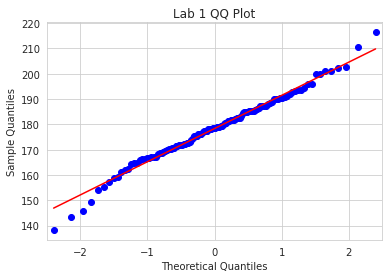

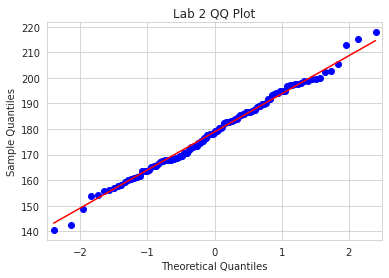

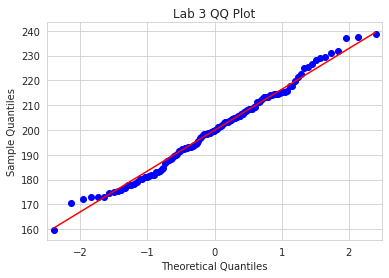

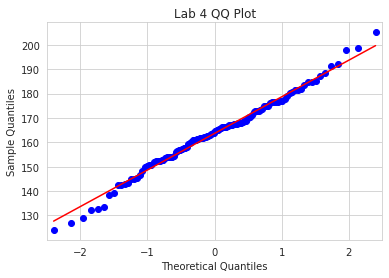

In [0]:
#Normality Test
#QQ PLOT

qqplot(data["Laboratory 1"], line = "s")
plt.title("Lab 1 QQ Plot")
plt.show()                            #Lab 1 looks like its following Normal Distribution
print("\n")
qqplot(data["Laboratory 2"], line = "s")
plt.title("Lab 2 QQ Plot")
plt.show()                            #Lab 2 looks like its following Normal Distribution
print("\n")
qqplot(data["Laboratory 3"], line = "s")
plt.title("Lab 3 QQ Plot")
plt.show()                            #Lab 3 looks like its following Normal Distribution
print("\n")
qqplot(data["Laboratory 4"], line = "s")
plt.title("Lab 4 QQ Plot")
plt.show()                            #Lab 4 looks like its following Normal Distribution

In [0]:
#Test for Normality: Anderson Darlington Test

print("Andreson Result for Laboratory 1: ", anderson(data["Laboratory 1"]))
print("Andreson Result for Laboratory 2: ", anderson(data["Laboratory 2"]))
print("Andreson Result for Laboratory 3: ", anderson(data["Laboratory 3"]))
print("Andreson Result for Laboratory 4: ", anderson(data["Laboratory 4"]))

Andreson Result for Laboratory 1:  AndersonResult(statistic=0.3182303220492031, critical_values=array([0.558, 0.636, 0.763, 0.89 , 1.059]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Andreson Result for Laboratory 2:  AndersonResult(statistic=0.25190066085194474, critical_values=array([0.558, 0.636, 0.763, 0.89 , 1.059]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Andreson Result for Laboratory 3:  AndersonResult(statistic=0.30013493831486926, critical_values=array([0.558, 0.636, 0.763, 0.89 , 1.059]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Andreson Result for Laboratory 4:  AndersonResult(statistic=0.37037834211437826, critical_values=array([0.558, 0.636, 0.763, 0.89 , 1.059]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [0]:
#Significance Level - 5%
#Null Hypothesis - Mean of all Labs are same. mu(1) = mu(2) = mu(3) = mu(4)
#Alternate Hypothesis - Mean of All Labs are not same.

In [0]:
#One way ANOVA
f_val, p_val = f_oneway(data["Laboratory 1"], data["Laboratory 2"], data["Laboratory 3"], data["Laboratory 4"])

In [0]:
print("F-Value: ", f_val)
print("P-Value: ", p_val)

F-Value:  118.70421654401437
P-Value:  2.1156708949992414e-57


In [0]:
#As the P Value is less than the significance level(0.05), we reject Null Hypothesis.
#Hence according to Problem Statement, we can say that there is a significant difference between average TAT
#among different Laboratories.

In [0]:
#Fantaloons.csv
#2-Proportion Test

#Reading the file from Google Drive

data = pd.read_csv("/content/drive/My Drive/ER/Hypothesis Testing/Faltoons.csv")
#data_x = data.drop(labels = ["y"], axis = 1)
#data_y = data["y"]

In [0]:
data.shape

(400, 2)

In [0]:
#Significance Level - 5%
#p1 - Proportion of male for Weekday
#p2 - Proportion of male for Weekend
#Null Hypothesis - Proportion of male for Weekday minus Proportion of male for Weekend is equal to 0. (p1 - p2) = 0 
#Alternate Hypothesis - Proportion of male for Weekday minus Proportion of male for Weekend is not equal to 0. (p1 - p2) != 0

In [0]:
Weekday_males = len(data[data["Weekdays"] == "Male"])

In [0]:
Weekday_females = len(data[data["Weekdays"] == "Female"])

In [0]:
Weekends_male = len(data[data["Weekend"] == "Male"])

In [0]:
Weekends_female = len(data[data["Weekend"] == "Female"])

In [0]:
df = pd.DataFrame([[Weekday_males, Weekday_females],[Weekends_male, Weekends_female]], columns = ["Male", "Female"],index = ["Weekday", "Weekend"] )

In [0]:
df

,Male,Female
Weekday,113,287
Weekend,167,233


In [0]:
#Using 2 Proportion test
#Calculating Chi Square values for data_cont

n1 = n2 = 400
p1 = (113/400)
p2 = (167/400)
p = (113+167)/(400+400)  #Where p is "Overall Sample Population "

#Calculating Z-Score
#Z = (p1-p2-0)/sqrt(p(1-p)((1/n1)+(1/n2)))
#Where Z is Z-Score for significance Level of 0.05
Z = float((p1-p2-0)/math.sqrt(p*(1-p)*((1/n1)+(1/n2))))

In [0]:
Z

-4.002746309969947

In [0]:
#From Z table, we can find the p value for Z = -4.0027
#p value for Z = -4.0027 is 0.00031

#As can be seen the p value is very much less than the Critical value/significance level, 
#hence we can reject the Null Hypothesis.

In [0]:
#As the P Value is less than the significance level(0.05), we reject Null Hypothesis.
#Hence according to Problem Statement, we can say that proportion of males coming to 
#store on any particular weekday is not equal to proportion of males coming to 
#store on any particular weekend.

In [0]:
#Buyer Ratio
#Chi Squared Test

#Reading the file from Google Drive

data = pd.read_csv("/content/drive/My Drive/ER/Hypothesis Testing/BuyerRatio.csv")
#data_x = data.drop(labels = ["y"], axis = 1)
#data_y = data["y"]

In [0]:
data

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [0]:
#Null Hypothesis - Proportion of Male and females are same.
#Alternate Hypothesis - Proportion of Male and Female are not same.
#Significance Level - 0.05

In [0]:
chi_val, p_val, dof, expected = chi2_contingency([[50, 142, 131, 70],[435,1523, 1356, 750]])

In [0]:
print("Chi Statistic: ", chi_val)
print("P value: ", p_val)
print("Degree of Freedom: ", dof)

Chi Statistic:  1.595945538661058
P value:  0.6603094907091882
Degree of Freedom:  3


In [0]:
#As we can see that the P value is larger than Significance level, we fail to reject Null Hypothesis.
#Hence, according to Problem Statement we can say that Proportion of Males and Females are same. 

In [0]:
#CustomerOrderForm.csv
#Chi Square Test

#Reading the file from Google Drive

data = pd.read_csv("/content/drive/My Drive/ER/Hypothesis Testing/CustomerOrderForm.csv")
#data_x = data.drop(labels = ["y"], axis = 1)
#data_y = data["y"]

In [0]:
data

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [0]:
dta = [[Phil_EF, Indo_EF, Mal_EF, Ind_EF], [Phil_D, Indo_D, Mal_D, Ind_D]]

In [0]:
Phil_EF = (data["Phillippines"] == "Error Free").sum()
Indo_EF = (data["Indonesia"] == "Error Free").sum()
Mal_EF = (data["Malta"] == "Error Free").sum()
Ind_EF = (data["India"] == "Error Free").sum()

Phil_D = (data["Phillippines"] == "Defective").sum()
Indo_D = (data["Indonesia"] == "Defective").sum()
Mal_D = (data["Malta"] == "Defective").sum()
Ind_D = (data["India"] == "Defective").sum()

In [0]:
df = pd.DataFrame(dta, index =  ["Error Free", "Defective"], columns = ['Phillippines', 'Indonesia', 'Malta', 'India'])

In [0]:
df

,Phillippines,Indonesia,Malta,India
Error Free,271,267,269,280
Defective,29,33,31,20


In [0]:
#Null Hypothesis  - Defective Percent varies by center.
#Alternate Hypothesis - Defective Percent does not vary by center.
#Significance Level - 0.05

In [0]:
chi_val, p_val, dof, expected = chi2_contingency(df)

In [0]:
print("Chi Statistic: ", chi_val)
print("P value: ", p_val)
print("Degree of Freedom: ", dof)

Chi Statistic:  3.858960685820355
P value:  0.2771020991233135
Degree of Freedom:  3


In [0]:
#As we can see that the P value is larger than Significance level, we fail to reject Null Hypothesis.
#Hence, according to Problem Statement we can say that Defective Percent varies by center. 